### Mission 1. Netfilx and Code

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
netflix = pd.read_csv('./netflix_titles.csv')
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [18]:
# 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?

netflix_count = netflix['country'].value_counts()
netflix_count

United States                           2555
India                                    923
United Kingdom                           397
Japan                                    226
South Korea                              183
                                        ... 
India, Australia                           1
Chile, Italy                               1
Ireland, United States                     1
Israel, Sweden, Germany, Netherlands       1
Denmark, Spain                             1
Name: country, Length: 681, dtype: int64

### Mission 2. 가즈아!

In [21]:
coin = pd.read_csv('./BitCoin.csv')
coin

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000
...,...,...,...,...,...,...,...,...
1604,1604,2013-02-05,116.38,125.60,92.28,105.21,6.722784e+06,1292190000
1605,1605,2013-01-05,139.00,139.89,107.72,116.99,8.026719e+06,1542820000
1606,1606,2013-04-30,144.00,146.93,134.05,139.00,8.312655e+06,1597780000
1607,1607,2013-04-29,134.44,147.49,134.00,144.54,7.757951e+06,1491160000


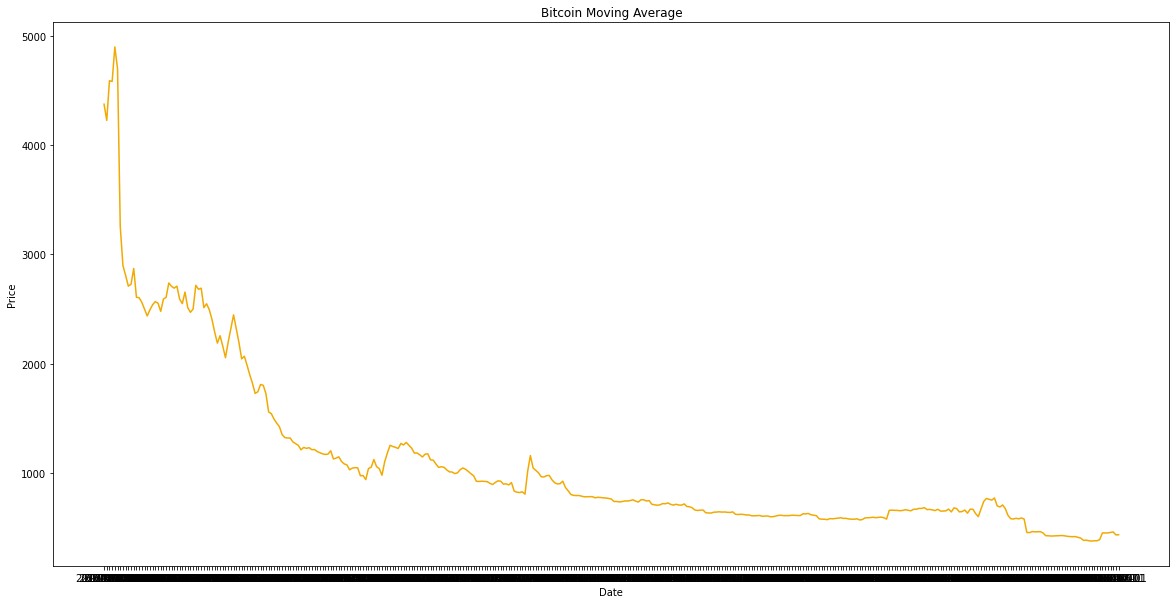

In [55]:
# 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프
# 이동평균의 기준은 Open
coin_date = (coin['Date'] >= '2016-06-01') & (coin['Date'] <='2017-06-30')
coin_open = coin['Open']
coin_result = coin[coin_date & coin_open]
# coin_result
plt.figure(figsize=(20,10))
plt.plot(coin_result['Date'], coin_result['Open'], '#f2a900')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Moving Average')

plt.show()